In [1]:
import glacierml as gl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
from matplotlib import ticker
import configparser
import pandas as pd
import os
pd.set_option('display.max_columns', None)

2024-04-22 21:59:00.140153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 21:59:00.140174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
home_path = '/home/simonhans/glacierml'
[
        data_path, RGI_path, glathida_path, 
        coregistration_testing_path, 
        arch_test_path, LOO_path
] = gl.set_paths(home_path)

In [23]:
cols, df = gl.load_LOO_data(home_path,include_train = False)
# df = df.dropna(subset = ['FMT'])

In [19]:
x = df['FMT'] / 1e3 * df['Area']
y = np.mean(df[cols] / 1e3, axis = 1) * df['Area']
# xy = np.vstack([np.log10(x),np.log10(y)])
# print('calculating density')
# z = gaussian_kde(xy)(xy)

bins_x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 25)
bins_y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 25)

Drawing scatter plot...
Drawing done
Setting scales and labels...


Text(10, 3500, 'B.')

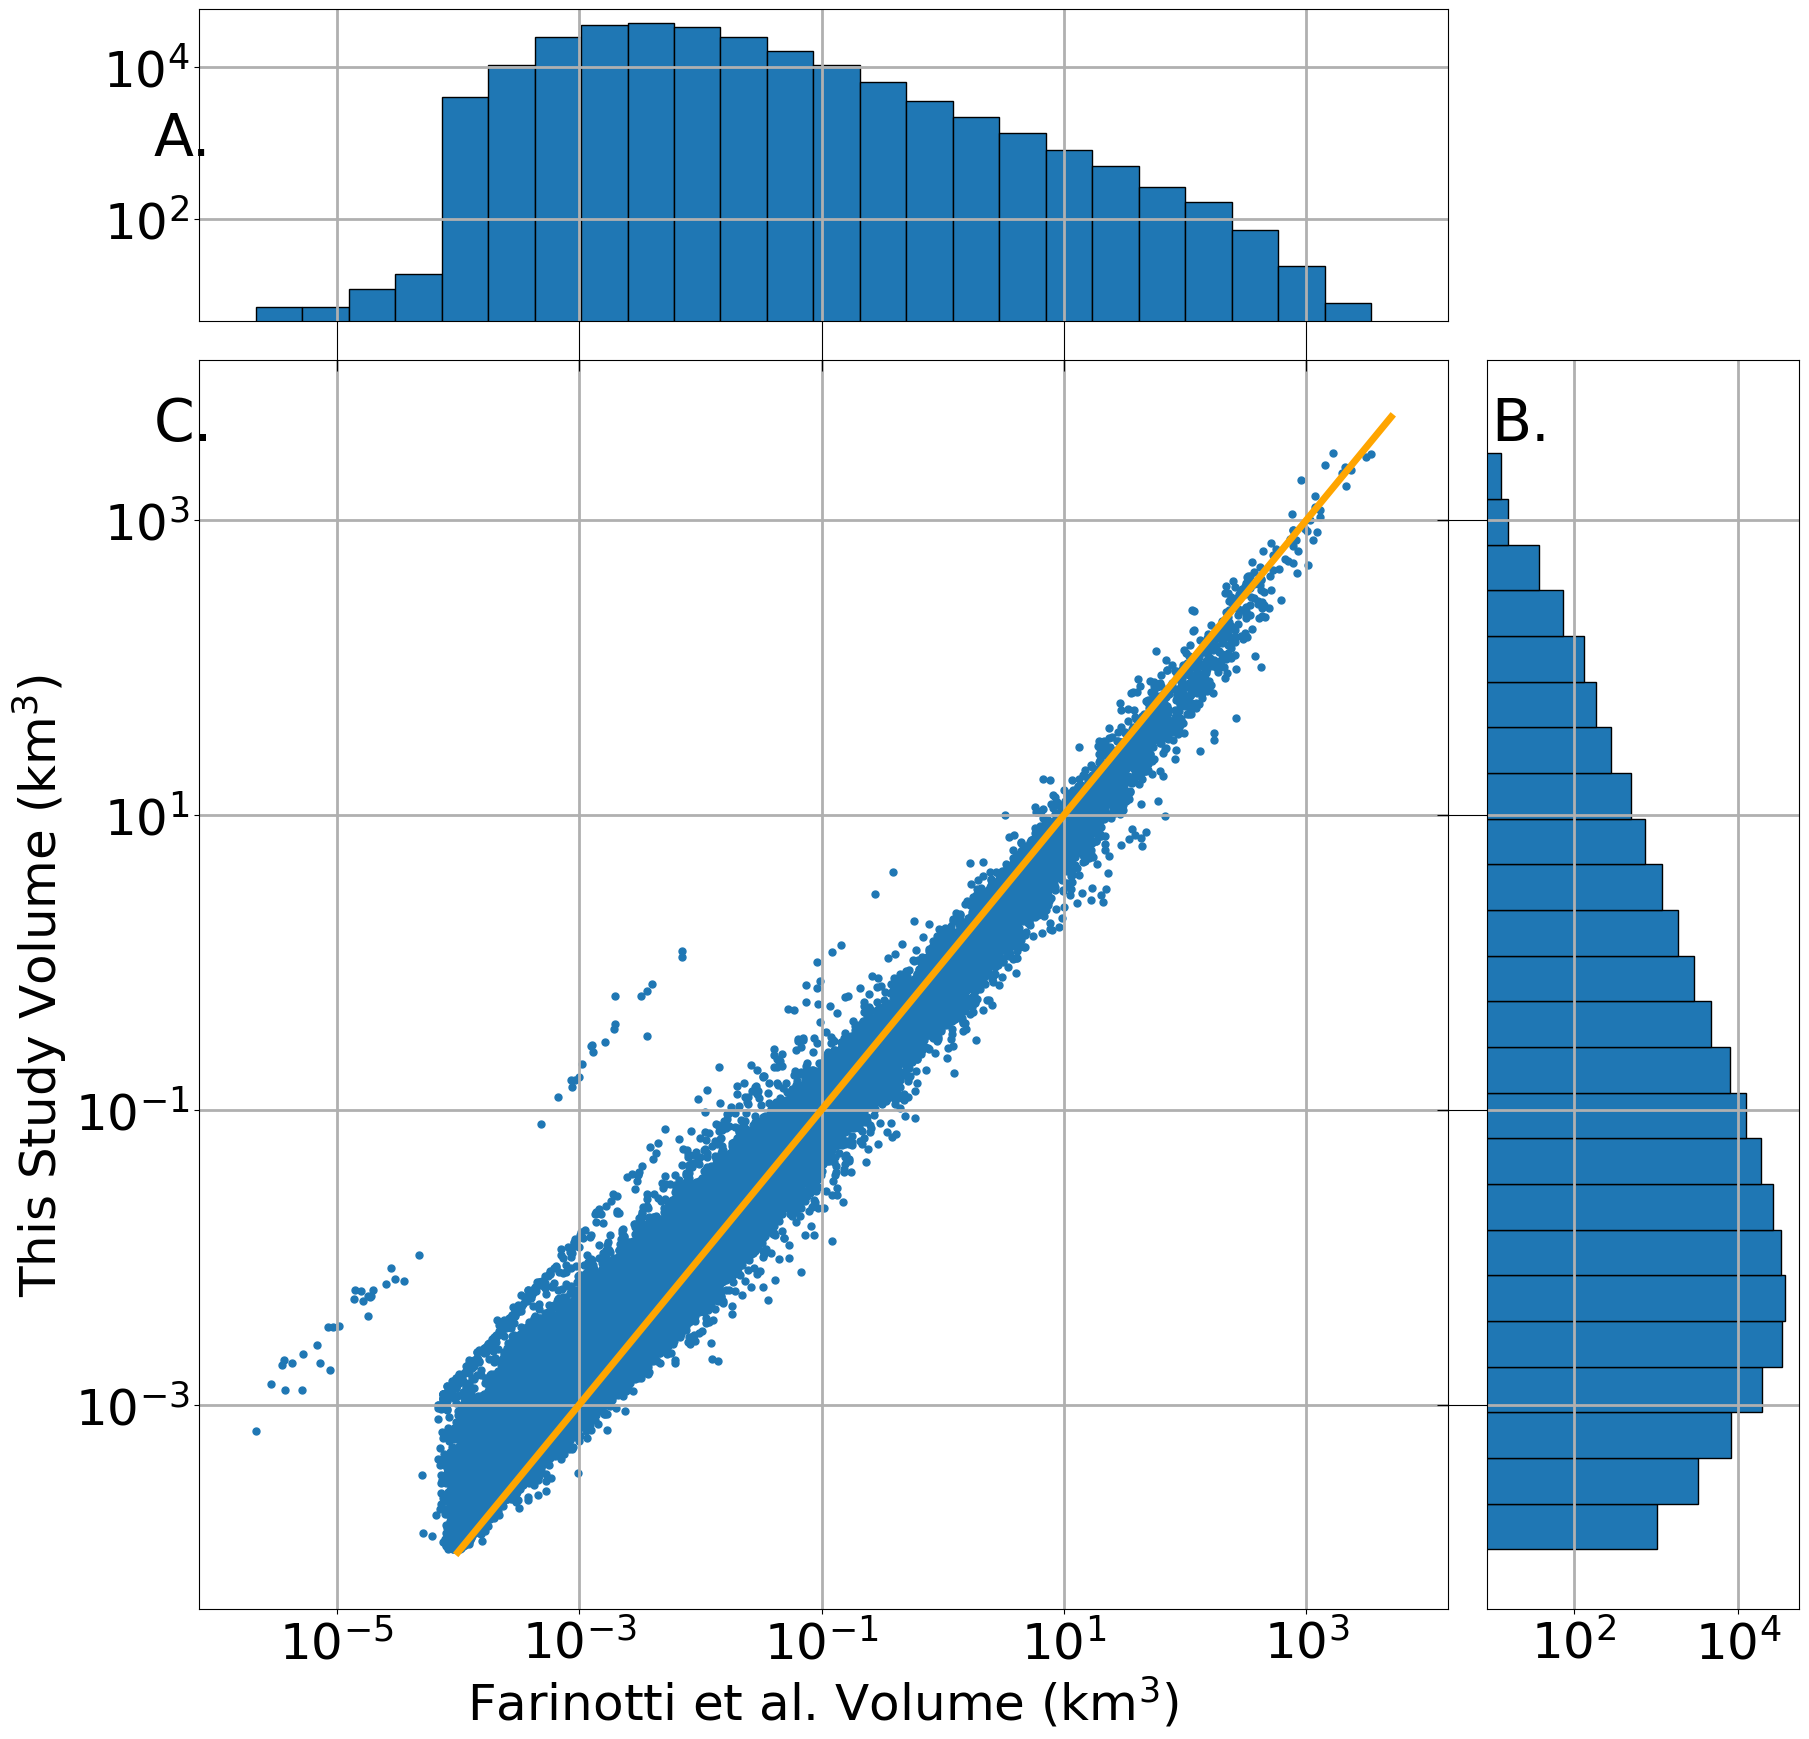

In [20]:
def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
    ax_histy.tick_params(axis="y", labelleft=False, size = 36)

    # the scatter plot:
    ax.scatter(x, y, 
               # c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.'
              )
    ax.plot(
        (0.0001,5000),
        (0.0001,5000),
        '-',
        c = 'orange',
        linewidth = 5

    )

    ax_histx.hist(
        (x), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )

    ax_histy.hist(
        (y), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=36)
    ax_histy.tick_params(axis="y", labelsize=36)
    ax_histy.grid(alpha = 1,linewidth = 2)
    ax_histx.grid(alpha = 1,linewidth = 2)

fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


print('Drawing scatter plot...')
scatter_hist(
    x, 
    y,
    ax, 
    ax_histx,
    ax_histy,
)
# plt.grid()
print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('This Study Volume (km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (km$^3$)', fontsize = 36)
# major_ticks = [1e-5,1e0,1e1,1e4]
# ax.set_xticks(major_ticks)
# ax.set_yticks(major_ticks)
ax.minorticks_on()

ax.grid(which = 'major',alpha = 1,linewidth = 2)
ax.grid(which = 'minor',alpha = 1,linewidth = 1,linestyle = '--')
plt.text(5e-16, 300000, 'A.',fontsize = 42)
plt.text(5e-16, 3500, 'C.',fontsize = 42)
plt.text(10, 3500, 'B.',fontsize = 42)

In [ ]:
# def scatter_hist(x, y, ax, 
#                  ax_histx, ax_histy
#                 ):
#     # no labels
#     ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
#     ax_histy.tick_params(axis="y", labelleft=False, size = 36)

#     # the scatter plot:
#     ax.scatter(x, y, 
#                c = (z), 
#                s = 100,
#                cmap = 'viridis',
#                marker = '.'
#               )
#     ax.plot(
#         (0.0001,5000),
#         (0.0001,5000),
#         '-',
#         c = 'orange',
#         linewidth = 5

#     )

#     ax_histx.hist(
#         (x), 
#         bins = bins_x,
#         edgecolor = 'black',
#         log = True
#     )

#     ax_histy.hist(
#         (y), 
#         bins = bins_y, 
#         edgecolor = 'black',
#         orientation='horizontal',
#         log = True
#     )
#     ax_histx.tick_params(axis="x", labelsize=36)
#     ax_histy.tick_params(axis="y", labelsize=36)
#     ax_histy.grid(alpha = 1,linewidth = 2)
#     ax_histx.grid(alpha = 1,linewidth = 2)

In [ ]:
# for reg in df['region'].sort_values().unique():
    
#     dft = df[df['region'] == reg]
    

#     x = dft['FMT'] / 1e3 * dft['Area']
#     y = np.mean(dft[cols] / 1e3, axis = 1) * dft['Area']
# #     xy = np.vstack([np.log10(x),np.log10(y)])
#     print('calculating density')
# #     z = gaussian_kde(xy)(xy)
#     plt.scatter(x,y,marker = '.')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.title('Region ' + reg + f'\nn = {len(dft)}')
#     if reg == '01':
#         plt.plot((0,4000),(0,4000),c = 'orange',linewidth = 2)
#     if reg == '02':
#         plt.plot((0,200),(0,200),c = 'orange',linewidth = 2)
#     if reg == '03':
#         plt.plot((0,2300),(0,2300),c = 'orange',linewidth = 2)
#     if reg == '04':
#         plt.plot((0,2000),(0,2000),c = 'orange',linewidth = 2)
#     if reg == '05':
#         plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
#     if reg == '06':
#         plt.plot((0,1000),(0,1000),c = 'orange',linewidth = 2)
#     if reg == '07':
#         plt.plot((0,1000),(0,1000),c = 'orange',linewidth = 2)
#     if reg == '08':
#         plt.plot((0,16),(0,16),c = 'orange',linewidth = 2)
#     if reg == '09':
#         plt.plot((0,900),(0,900),c = 'orange',linewidth = 2)
#     if reg == '10':
#         plt.plot((0,10),(0,10),c = 'orange',linewidth = 2)        
#     if reg == '11':
#         plt.plot((0,20),(0,20),c = 'orange',linewidth = 2)
#     if reg == '12':
#         plt.plot((0,4),(0,4),c = 'orange',linewidth = 2)
#     if reg == '13':
#         plt.plot((0,300),(0,300),c = 'orange',linewidth = 2)
#     if reg == '14':
#         plt.plot((0,500),(0,500),c = 'orange',linewidth = 2)
#     if reg == '15':
#         plt.plot((0,40),(0,40),c = 'orange',linewidth = 2)        
#     if reg == '16':
#         plt.plot((0,1),(0,1),c = 'orange',linewidth = 2)    
#     if reg == '17':
#         plt.plot((0,1e3),(0,1e3),c = 'orange',linewidth = 2)
#     if reg == '18':
#         plt.plot((0,20),(0,20),c = 'orange',linewidth = 2)
#     if reg == '19':
#         plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
#     plt.show()

In [ ]:
# y = np.mean(df[cols]/1e3,axis = 1) * df['Area']
# x = df['FMT']/1e3 * df['Area']

In [ ]:
# df = pd.concat([df,pd.Series(y-x,name = 'r')],axis = 1)

In [ ]:
# df

In [ ]:
# for reg in df['region'].sort_values().unique():
    
#     dft = df[df['region'] == reg]
#     dft = dft.dropna(subset = 'r')
#     if dft.empty:
#         continue
#     else:
#         x = dft['Area']
#         y = dft['r']

# #         print('calculating density')
# #         z = gaussian_kde(xy)(xy)
#         plt.scatter(x,y,marker = '.',label = 'Positive')
#         plt.scatter(x,-y,marker = '.',label = 'Negative')
#         plt.xscale('log')
#         plt.yscale('log')
# #         plt.ylim(y.min(),y.max())
#         plt.title('Region ' + reg)
#         plt.legend()
#         plt.show()

In [ ]:
# parameterized_data = gl.load_training_data(RGI_input = 'y')
# data = gl.load_notebook_data('4')
# data = data.dropna(subset = 'FMT')
# fig = plt.figure(figsize=(20,20))
# for n, region in tqdm(enumerate(['01', '03', '05', '19'])):
#     if region == '01':
#         region_name = 'Alaska'
#     if region == '03':
#         region_name = 'Canada'
#     if region == '05':
#         region_name = 'Greenland Periphery'
#     if region == '19':
#         region_name = 'Antarctic Periphery'
#     df = data[data['region']==region]
#     param = parameterized_data[parameterized_data['region'] == region]
#     data_1 = df['FMT'] / 1e3 * df['Area']
#     vol_f = data_1

#     data_2 = df['WT1'] / 1e3 * df['Area']
#     vol_e = data_2

#     x_1 = np.sort(data_1)
#     y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

#     x_2 = np.sort(data_2)
#     y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#     xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

#     z = gaussian_kde(xy)(xy)

#     ax = plt.subplot(2,2,n+1)
#     ax.scatter(vol_f, vol_e, 
#                c = (z), 
# #                s = 100,
#                cmap = 'viridis',
# #                marker = '.'
#               )
#     ax.plot(
#         (0,round(vol_e.max()/ (vol_e.max()/2))*(vol_e.max()/2)),
#         (0,round(vol_e.max()/(vol_e.max()/2))*(vol_e.max()/2)),
#         '-',
#         c = 'orange',
#         linewidth = 5

#     )
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_title('RGI Region '+ region + ', ' + region_name,
#                  fontsize = 36#                  '\n' + 
# #                  str(np.round((len(df)/len(data)) * 100, 2)) + '% of world glaciers\n'+
# #                  str(np.round((len(param) / len(parameterized_data)) * 100, 2)) + 
# #                  '% of training data'
# #                 , fontsize
#                 )
#     major_ticks = np.logspace(-3,3,3)
#     minor_ticks = np.logspace(-2,2,5)
#     ax.set_yticks(minor_ticks,minor = True)
#     ax.set_yticks(major_ticks)
#     ax.set_xticks(minor_ticks,minor = True)
#     ax.set_xticks(major_ticks)

#     ax.tick_params(axis="both",which = 'both', labelsize=20)
#     ax.grid(which = 'major',linewidth = 2)
#     ax.grid(which = 'minor',linewidth = 1,linestyle = '--')

# #     ax.set_ylabel('E&L Volume (10$^3$ km$^3$)')
# #     ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)')

# # plt.suptitle(
# #     'Regional Ice Volume Compared to Farinotti et al. 2019', fontsize = 36, y = .99)

# fig.supylabel('This Study Volume (km$^3$)', fontsize = 36)
# fig.supxlabel('Farinotti et al. Volume (km$^3$)', fontsize = 36)

# plt.tight_layout()
# # plt.savefig('figs/regional_scatter' + str(i) + '.png')